# 📊 课堂实践：普通最小二乘回归（OLS）

本节将通过 `wooldridge` 数据库中的 `ceosal1` 数据，演示如何用 Python 实现最基础的一元线性回归（OLS）估计。

## 1️⃣ 导入必要的库（Import Required Libraries）

In [1]:
import wooldridge as woo  # 加载经济学数据集
import numpy as np        # 数值计算库
import matplotlib.pyplot as plt  # 数据可视化库

## 2️⃣ 加载数据并查看结构（Load Dataset & Preview）
我们使用 `ceosal1` 数据集，该数据集包含 CEO 薪资与公司财务指标。

In [2]:
ceosal1 = woo.dataWoo('ceosal1')  # 加载 ceosal1 数据集
ceosal1.head(5)  # 查看前五行数据

,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
0,1095,20,27595.000000,14.1,106.400002,191,1,0,0,0,6.998509,10.225389
1,1001,32,9958.000000,10.9,-30.600000,13,1,0,0,0,6.908755,9.206132
2,1122,9,6125.899902,23.5,-16.299999,14,1,0,0,0,7.022868,8.720281
3,578,-9,16246.000000,5.9,-25.700001,-21,1,0,0,0,6.359574,9.695602
4,1368,7,21783.199219,13.8,-3.000000,56,1,0,0,0,7.221105,9.988894


## 3️⃣ 可视化：薪资与净资产收益率的关系（Salary vs ROE）

先绘制薪水（salary）与净资产收益率（roe）之间的散点图，观察是否存在线性趋势。

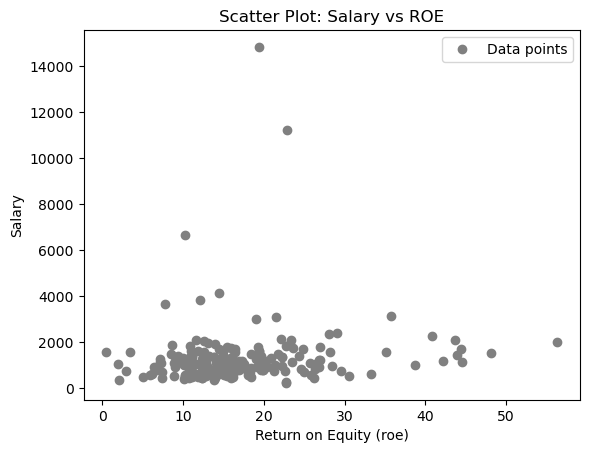

In [3]:
plt.figure(figsize=(6.4, 4.8))
plt.plot(ceosal1['roe'], ceosal1['salary'], color='grey', marker='o', linestyle='', label='Data points')

plt.xlabel('Return on Equity (roe)', fontsize=10)
plt.ylabel('Salary', fontsize=10)
plt.title('Scatter Plot: Salary vs ROE', fontsize=12)
plt.legend()
plt.show()

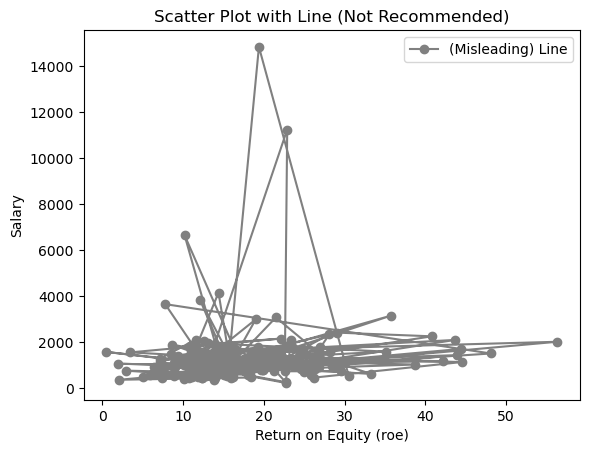

In [4]:
# 用折线图代替散点图会失去信息，下面代码主要是为了对比展示
plt.figure(figsize=(6.4, 4.8))
plt.plot(ceosal1['roe'], ceosal1['salary'], color='grey', marker='o', linestyle='-', label='(Misleading) Line')

plt.xlabel('Return on Equity (roe)', fontsize=10)
plt.ylabel('Salary', fontsize=10)
plt.title('Scatter Plot with Line (Not Recommended)', fontsize=12)
plt.legend()
plt.show()

## 4️⃣ 手动估计回归系数（Estimate Coefficients Manually）

我们根据 OLS 理论公式，手动计算回归系数：

模型形式为：$salary = \beta_0 + \beta_1 \cdot roe + \epsilon$

估计量为：
- $\hat{\beta}_1 = \frac{Cov(x, y)}{Var(x)}$
- $\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \cdot \bar{x}$

结果：$\hat{salary} = 963.1913 + 18.5012 \cdot roe$

In [5]:
x = ceosal1['roe']  # 提取 'roe' 变量
y = ceosal1['salary']  # 提取 'salary' 变量

cov_xy = np.cov(x, y)[0, 1]  # 获取协方差矩阵中的协方差
var_x = np.var(x, ddof=1)  # 计算 x 的样本方差（ddof=1表示样本方差）
b1 = cov_xy / var_x  # 计算回归系数 β1

x_bar = np.mean(x)  # 计算 'roe' 的均值
y_bar = np.mean(y)  # 计算 'salary' 的均值
b0 = y_bar - b1 * x_bar  # 根据公式计算 β0

print(f'cons: {b0:.4f}')  # 输出 b0
print(f'roe: {b1:.4f}')  # 输出 b1


cons: 963.1913
roe: 18.5012


## 5️⃣ 可视化回归结果（Plot the Fitted Regression Line）

我们使用上一步计算出的回归系数 b0 与 b1 来绘制回归拟合线，并与原始数据的散点图进行叠加对比。

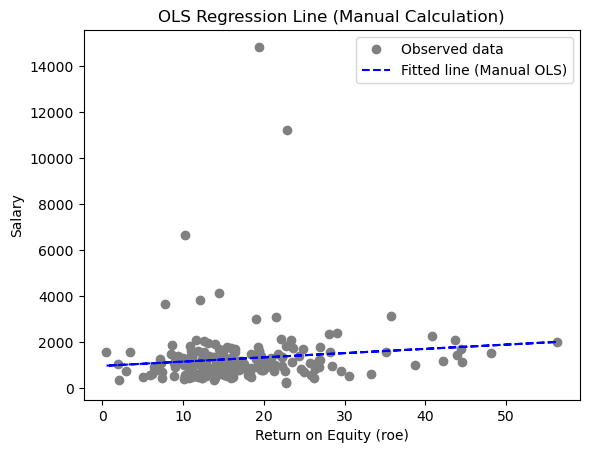

In [6]:
# 拟合值（注意此处原来代码错误地用了两次 b0）
y_hat = b0 + b1 * ceosal1['roe']

plt.figure(figsize=(6.4, 4.8))
plt.plot(ceosal1['roe'], ceosal1['salary'], 'o', color='grey', label='Observed data')
plt.plot(ceosal1['roe'], y_hat, '--', color='blue', label='Fitted line (Manual OLS)')

plt.xlabel('Return on Equity (roe)')
plt.ylabel('Salary')
plt.title('OLS Regression Line (Manual Calculation)')
plt.legend()
plt.show()

## 🧮 课堂练习 1：矩阵方法求解回归系数（Linear Algebra Approach）

- 模型：$salary = \beta_0+\beta_1 roe + \epsilon$
- 我们将使用 OLS 的矩阵公式进行计算：$\hat{\beta} = (X^TX)^{-1}X^Ty$
    - 其中：
        - $y$ 是 $n \times 1$ 的目标变量向量
        - $X$ 是 $n \times 2$ 的设计矩阵（第一列为常数项）
        - $\beta$ 是 $p \times 1$ 的回归系数向量
        - $\epsilon$ 是误差项
- 结果：$\hat{salary} = 963.1913 + 18.5012 \cdot roe$

In [7]:
x = ceosal1['roe']  # 提取自变量 'roe'
y = ceosal1['salary']  # 提取因变量 'salary'

cons = np.ones(x.shape)  # 创建一个与 x 同大小的常数项向量，用于添加截距项
X = np.c_[cons, x]  # 将常数项和 'roe' 组合成一个矩阵 X，其中第一列是常数项，第二列是 'roe'

beta = np.linalg.inv(X.T @ X) @ X.T @ y  # 计算回归系数

print(f'cons: {beta[0]:.4f}')  # 截距项
print(f'roe: {beta[1]:.4f}')  # 'roe' 的回归系数

cons: 963.1913
roe: 18.5012


## 📐 课堂练习 2：基于矩阵回归结果绘图

现在使用上述通过矩阵方法求得的系数，画出拟合线。

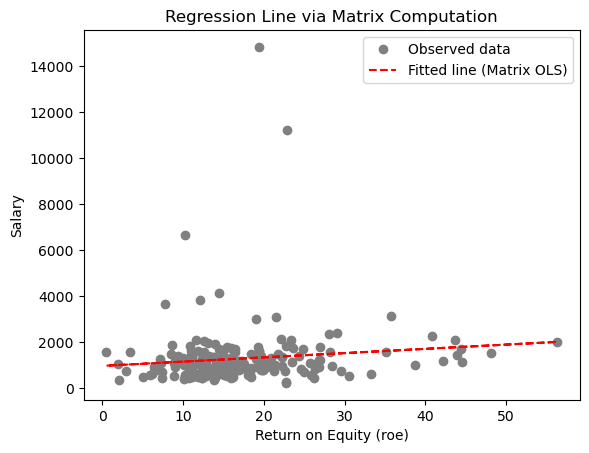

In [8]:
y_hat_2 = X @ beta  # 预测值

plt.figure(figsize=(6.4, 4.8))
plt.plot(ceosal1['roe'], ceosal1['salary'], 'o', color='grey', label='Observed data')
plt.plot(ceosal1['roe'], y_hat_2, '--', color='red', label='Fitted line (Matrix OLS)')

plt.xlabel('Return on Equity (roe)')
plt.ylabel('Salary')
plt.title('Regression Line via Matrix Computation')
plt.legend()
plt.show()

## 📊 课堂练习3（拓展）： 计算回归系数 $\beta_0$ 和 $\beta_1$（调用现成的包：`import statsmodels.api as sm`）
- 模型：$salary = \beta_0+\beta_1 roe + \epsilon$
    - 模型构建 `model = sm.OLS(y, X)`：使用了 statsmodels 库的 OLS 函数来构建回归模型
    - 该函数接受两个主要参数：
        - $y$ 因变量，是一个包含观测值的向量（在上述模型中，表示各个观测单位的薪水）
        - $X$ 自变量矩阵，它包含了所有用于预测的特征变量（上述模型中，包括常数项（截距）和 roe 变量）
    - 模型被构建后，通过 `model.fit()` 方法对数据进行拟合，得到回归系数，并计算其他统计量（如 $t$ 值、$p$ 值、标准误差等）
    - 异方差稳健标准误差：在回归过程中，可能存在异方差（不同观测值的误差项方差不同）。
        - 使用 `cov_type='HC0'` 来指定计算 White异方差稳健标准误差，这能够调整标准误差的估计，使得回归系数的统计推断更加可靠
- 结果：$\hat{salary} = 963.1913 + 18.5012 \cdot roe$

In [9]:
import statsmodels.api as sm

x = ceosal1['roe']
y = ceosal1['salary']
X = sm.add_constant(x)  # 自动添加常数项

model = sm.OLS(y, X)
results = model.fit(cov_type='HC0')  # 使用稳健标准误差

# 输出完整回归结果
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     7.410
Date:                Sun, 23 Mar 2025   Prob (F-statistic):            0.00704
Time:                        19:56:28   Log-Likelihood:                -1804.5
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        963.1913    120.525      7.992      0.0